<h1 style="font-family: sans-serif;font-size:30px;text-align:center;" font-weight:900;>ML Antivirus Project</h1>

<hr style="border-color:gray; width:75%;box-shadow:0px 1px 3px gray;">

<h3 style="font-family:sans-serif;">Hello Mr. Maleki</h3>

<p style="font-size:large;font-family:sans-serif;">Based on our previous discussions, the chess project seemed unfeasible. I encountered difficulties implementing the Windows Defender dataset for the antivirus; there was an issue with the volume, and uploading it to Google Colab failed due to its size, which was approximately 100 gigabytes, whereas I required 500 gigabytes. Consequently, I opted for a much lighter dataset and proceeded with my work. While it may lack comprehensive training for real-world scenarios, it has performed exceptionally well in its own tests.
Now let's start!
三三ᕕ( ᐛ )ᕗ</p>

In [162]:
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier , GradientBoostingClassifier
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import confusion_matrix , accuracy_score 
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<p style="font-size:large;font-family:sans-serif;">The aforementioned imports encompass three models pivotal for our operational endeavors. Furthermore, they comprise fundamental components requisite for the construction of a Machine Learning framework, which invariably remain ubiquitous ↑(⁠o⁠_⁠O⁠)<br><br>At the conclusion, the dataset is loaded and subsequently stored in two variables, namely 'legit' and 'mal'.</p>

In [163]:
MalDataSet = pd.read_csv("MalwareData.csv",sep="|")
legit = MalDataSet[0:41323].drop(['legitimate'],axis=1)
mal = MalDataSet[41323::].drop(['legitimate'],axis=1)

print("The Shape of the legit dataset is %s samples, %s features"%(legit.shape[0],legit.shape[1]))
print("The Shape of malware dataset is %s smaples , %s features"%(MalDataSet.shape[0],MalDataSet.shape[1]))

The Shape of the legit dataset is 41323 samples, 56 features
The Shape of malware dataset is 138047 smaples , 57 features


<p style="font-size:large;font-family:sans-serif;">At the conclusion, by leveraging pandas, we surpass the limitations on the number of views, thereby displaying all columns within the dataset</p>

In [164]:
pd.set_option("display.max_columns",None)

<p style="font-size:large;font-family:sans-serif;">Now, let us proceed to examine the dataset.</p>

In [165]:
MalDataSet

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,6135,4096,372736,4194304.0,4096,512,0,0,0,0,1,0,1036288,1024,485887,16,1024,1048576,4096,1048576,4096,0,16,8,5.766807,3.607430,7.221051,59712.0,1024,325120,126875.875,896,551848,0,0,0,0,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,81778,4096,143360,771751936.0,4096,512,5,1,0,0,5,1,159744,1024,188943,2,33088,1048576,4096,1048576,4096,0,16,4,4.839688,2.373525,6.566909,35584.0,2048,130560,37322.000,1840,130296,7,181,0,0,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,350896,4096,811008,771751936.0,4096,512,5,1,0,0,5,1,1150976,1024,1159817,2,32832,1048576,4096,1048576,4096,0,16,4,6.409558,4.885191,7.600957,273408.0,21504,517120,284498.000,21456,516760,14,235,21,1,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,451258,4096,798720,771751936.0,4096,512,5,1,0,0,5,1,962560,1024,867570,2,33088,1048576,4096,1048576,4096,0,16,4,6.641731,5.642565,7.594929,207872.0,15360,585728,238502.000,15208,585488,15,360,6,1,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,217381,4096,536576,771751936.0,4096,512,5,1,0,0,5,1,552960,1024,579287,2,33088,1048576,4096,1048576,4096,0,16,4,6.252684,4.182282,7.608305,128128.0,2560,294912,135350.000,2320,294816,10,194,4,1,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,123291,4096,212992,4194304.0,4096,512,5,1,0,0,5,1,442368,1024,0,2,33088,1048576,4096,1048576,4096,0,16,5,4.787797,2.247185,6.516364,84070.4,7168,205824,85753.600,16340,205644,7,133,0,0,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,40000,4096,45056,4194304.0,4096,512,1,0,6,0,4,0,253952,1024,0,2,32768,1048576,16384,1048576,4096,0,16,8,2.256582,0.000000,6.562232,27904.0,0,181248,28451.500,8,180988,8,96,0,0,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,59610,4096,122880,4194304.0,4096,512,5,1,0,0,5,1,516096,1024,515385,2,33088,1048576,4096,1048576,4096,0,16,5,5.659426,4.217938,7.977423,99737.6,9728,331264,101043.000,9304,330808,6,107,0,0,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f

<p style="font-size:large;font-family:sans-serif;">We omit the 'Name', 'md5', and 'legitimate' columns as they do not significantly impact the Machine Learning process. Subsequently, we extract the labels from the 'legitimate' column and place them into an array. We then train the model using these labels to identify the most influential features within the dataset for determining the file's viral status<br>We then assign the resulting values to a new variable.</p>

In [166]:
data_in = MalDataSet.drop(['Name','md5','legitimate'],axis=1)
labels = MalDataSet['legitimate'].values
XRUS_Model = ExtraTreesClassifier().fit(data_in,labels)
select = SelectFromModel(XRUS_Model,prefit=True)
data_in_new= select.transform(data_in)
print(data_in.shape,data_in_new.shape)

(138047, 54) (138047, 12)


/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


<p style="font-size:large;font-family:sans-serif;">Following this, we proceed to calculate, sort, and subsequently print the features to discern the most influential factor</p>

In [168]:
features = data_in_new.shape[1]
importances = XRUS_Model.feature_importances_
indices = np.argsort(importances)[::-1]

for i in range(features):
    print("%d"%(i+1),MalDataSet.columns[2+indices[i]],importances[indices[i]])

1 DllCharacteristics 0.15274760087452838
2 Characteristics 0.1098750949270392
3 Machine 0.10612830193540462
4 ImageBase 0.06258140928085158
5 VersionInformationSize 0.0568199873019589
6 SizeOfOptionalHeader 0.056035819220802204
7 SectionsMaxEntropy 0.053661772648754755
8 Subsystem 0.053440127805033225
9 MajorSubsystemVersion 0.05129704363911413
10 ResourcesMaxEntropy 0.036757816725048305
11 ResourcesMinEntropy 0.03285251477994732
12 MajorOperatingSystemVersion 0.025631090959023814


<p style="font-size:large;font-family:sans-serif;">After reviewing the outcomes, I deemed it beneficial to request ChatGPT to generate a similar model for computing and sorting the most significant features. GPT then produced the following.</p>

In [169]:
# ساخت مدل RandomForestClassifier
model = RandomForestClassifier()

# آموزش مدل با داده‌های آموزشی
model.fit(legit_train, mal_train)

# محاسبه اهمیت ویژگی‌ها
importances = model.feature_importances_

# مرتب کردن اهمیت ویژگی‌ها به ترتیب نزولی
indices = np.argsort(importances)[::-1]

# نمایش اهمیت ویژگی‌ها
features = len(importances)
for i in range(features):
    print("%d. %s: %f" % (i+1, MalDataSet.columns[indices[i]], importances[indices[i]]))

1. SizeOfOptionalHeader: 0.214754
2. SizeOfInitializedData: 0.187401
3. Machine: 0.148559
4. ImageBase: 0.084899
5. MinorLinkerVersion: 0.073875
6. Characteristics: 0.063448
7. BaseOfCode: 0.044765
8. AddressOfEntryPoint: 0.043832
9. SizeOfUninitializedData: 0.038354
10. SizeOfCode: 0.038025
11. BaseOfData: 0.022735
12. MajorLinkerVersion: 0.021841
13. Name: 0.009437
14. md5: 0.008075


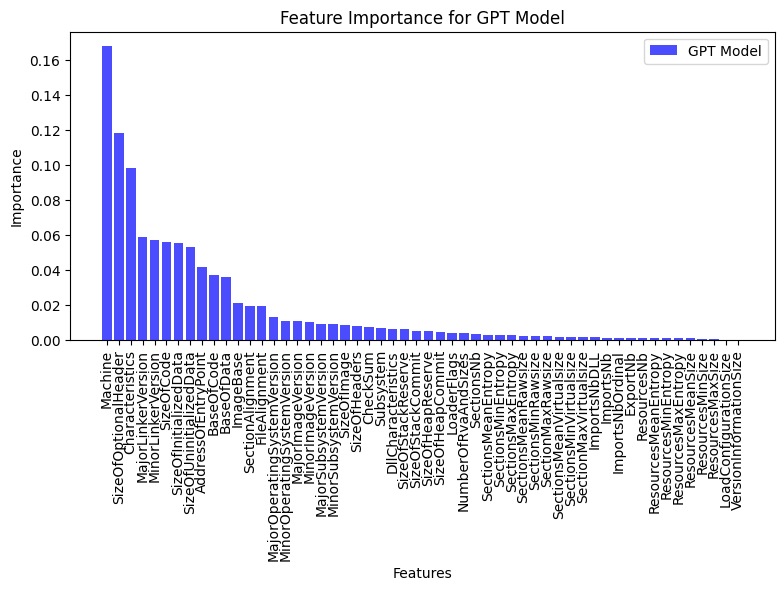

In [139]:
importances_my_model = XRUS_Model.feature_importances_
indices_my_model = np.argsort(importances_my_model)[::-1]
importances_your_model = model.feature_importances_
indices_your_model = np.argsort(importances_your_model)[::-1]
num_features = len(importances_my_model)
x = range(num_features)
importances_your_model_resized = np.zeros(num_features)
importances_your_model_resized[:len(importances_your_model)] = importances_your_model
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.bar(x, importances_my_model[indices_my_model], label='GPT Model', alpha=0.7, color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for GPT Model')
plt.xticks(x, MalDataSet.columns[2:num_features + 2], rotation=90)
plt.legend()

<p style="font-size:large;font-family:sans-serif;">After consulting ChatGPT, it became evident that its results differed significantly from mine, leading to confusion. Through further inquiries, it became apparent that various models prioritize certain features over others. Consequently, each model varies from one another, resulting in distinct sets of features depending on the model employed.</p>

<hr style="border-color:gray; width:75%;box-shadow:0px 1px 3px gray;">
<h2 style="font-family:sans-serif;text-align:center">The first model, RandomForestClassifier</h2>

<p style="font-size:large;font-family:sans-serif;">Subsequently, we partition the data into training and testing sets, allocating them to four variables. Utilizing an 80-20 split, we assign 20% of the data for testing purposes, reserving the remainder for training the model. Following this, we construct our model using the RandomForestClassifier algorithm, specifying 50 decision trees, and proceed to train it.</p>

In [172]:
legit_train, legit_test, mal_train, mal_test = train_test_split(data_in_new, labels, test_size=0.2)
classif = RandomForestClassifier(n_estimators=50)
classif.fit(legit_train,mal_train)

RandomForestClassifier(n_estimators=50)

<p style="font-size:large;font-family:sans-serif;">We then make predictions on the 'legit_test' dataset and store the results in a variable. Despite the apparent disparity in chart representation, the model's performance score remains notably high, although its visualization in the context of machine learning presents a challenge for me.</p>

Score :  99.3915248098515


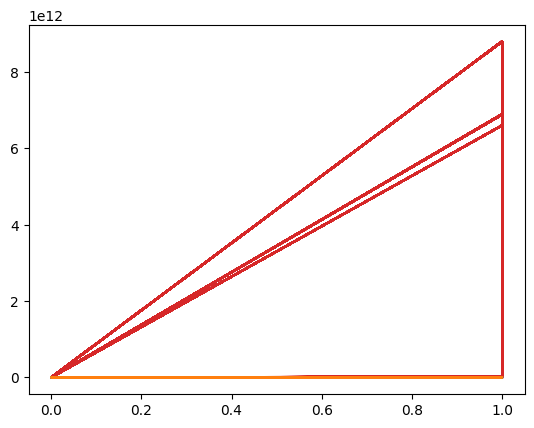

In [173]:
result = classif.predict(legit_test)
plt.plot(result*1.00 , legit_test)
print("Score : ",classif.score(legit_test,mal_test)*100)

<p style="font-size:large;font-family:sans-serif;">Subsequently, by utilizing the confusion_matrix function, we can discern the number of false positives and false negatives encountered by the model.</p>

In [115]:
conf_mat = confusion_matrix(mal_test,result)
print("False positive ", (conf_mat[0][1]/sum(conf_mat)[0])*100)
print("False negative ", conf_mat[1][0]/sum(conf_mat[1])*100)

False positive  0.5093290369523414
False negative  0.7440297611904476


<p style="font-size:large;font-family:sans-serif;">Excellent news! It appears that this model demonstrates the lowest error rate</p>

<hr style="border-color:gray; width:75%;box-shadow:0px 1px 3px gray;">
<h2 style="font-family:sans-serif;text-align:center">The secend model, GradientBoostingClassifier</h2>

In [174]:
grad_boost = GradientBoostingClassifier(n_estimators=50)
grad_boost.fit(legit_train,mal_train)
pre = grad_boost.predict(legit_test)

<p style="font-size:large;font-family:sans-serif;">Next, we evaluate the score and visualize the performance chart of the GradientBoostingClassifier model.</p>

Score  98.84824339007606


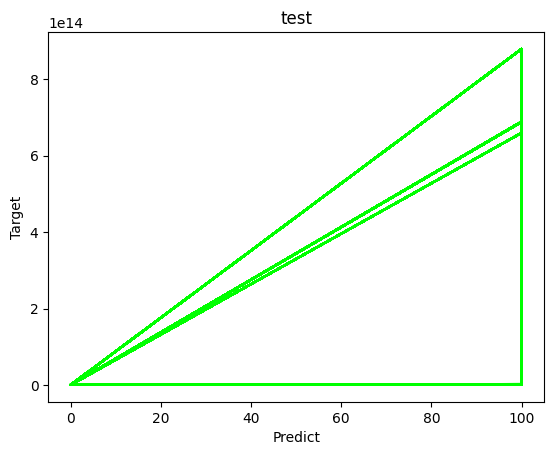

In [175]:
plt.ylabel("Target")
plt.xlabel("Predict")
plt.title("test")
plt.plot(pre*100 ,legit_test*100, color="lime")
print("Score ", grad_boost.score(legit_test,mal_test)*100)

<p style="font-size:large;font-family:sans-serif;">Once again, while the scores are satisfactory, the statistical metrics do not exhibit optimal performance. This time, the metrics form a triangular shape.</p>

In [176]:
conf_mat = confusion_matrix(mal_test,pre)
print("False positive ", (conf_mat[0][1]/sum(conf_mat)[0])*100)
print("False negative ", conf_mat[1][0]/sum(conf_mat[1])*100)

False positive  0.750595299720468
False negative  2.079326923076923


<p style="font-size:large;font-family:sans-serif;">In light of the suboptimal performance, let us explore alternative models.</p>

<hr style="border-color:gray; width:75%;box-shadow:0px 1px 3px gray;">
<h2 style="font-family:sans-serif;text-align:center">The third model, DecisionTreeClassifier</h2>

<p style="font-size:large;font-family:sans-serif;">This model corresponds to the renowned classifier employed for identifying Irish flowers.</p>

In [177]:
model = DecisionTreeClassifier()
model.fit(legit_train,mal_train)
predict = model.predict(legit_test)
accuracy = accuracy_score(mal_test,predict)
print(accuracy)

0.9905469032959073


In [178]:
conf_mat = confusion_matrix(mal_test,predict)
print("False positive ", (conf_mat[0][1]/sum(conf_mat)[0])*100)
print("False negative ", conf_mat[1][0]/sum(conf_mat[1])*100)

False positive  0.7212162092045867
False negative  1.4663461538461537


<p style="font-size:large;font-family:sans-serif;">The scores for this model are also commendable, with notably lower rates of false positives and false negatives compared to the previous model, albeit slightly higher than those of the initial model.</p>

<hr style="border-color:gray; width:75%;box-shadow:0px 1px 3px gray;">
<h2 style="font-family:sans-serif;text-align:center">The fourth model, KNeighborsClassifier</h2>

In [179]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(legit_train, mal_train)
knn_predictions = knn_model.predict(legit_test)
knn_accuracy = accuracy_score(mal_test, knn_predictions)
print("Score of KNN model:", knn_accuracy)

Score of KNN model: 0.990112278160087


In [180]:
conf_mat = confusion_matrix(mal_test,knn_predictions)
print("False positive ", (conf_mat[0][1]/sum(conf_mat)[0])*100)
print("False negative ", conf_mat[1][0]/sum(conf_mat[1])*100)

False positive  0.8896519431871391
False negative  1.2259615384615385


<p style="font-size:large;font-family:sans-serif;">Interestingly, this model yields identical scores to the previous one. However, adjusting the number of neighbors in the model exacerbates the situation, with the optimal option being five neighbors.</p>

<hr style="border-color:gray; width:75%;box-shadow:2px 3px 5px gray;">
<h2 style="font-family:sans-serif;text-align:center;">Review</h2>

<p style="font-size:larger;font-family:sans-serif;">"I tasked ChatGPT with consolidating all the models' code and generating a corresponding diagram. While the chart produced by ChatGPT may not have surpassed my own, it effectively presented all the models in a single frame, facilitating quick comparison."</p>

The Shape of the legit dataset is 41323 samples, 56 features
Shape of malware dataset is 96724 samples, 56 features


/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(138047, 12)
RandomForestClassifier Accuracy: 0.9935530604853314


<Figure size 600x600 with 0 Axes>

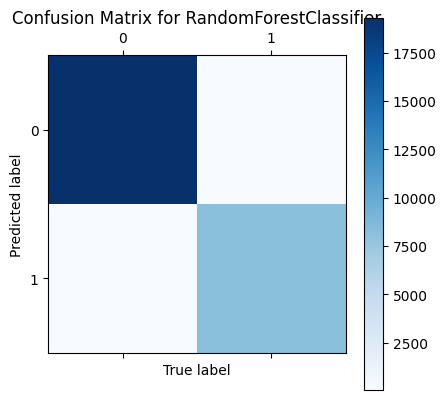

GradientBoostingClassifier Accuracy: 0.9885548714233974


<Figure size 600x600 with 0 Axes>

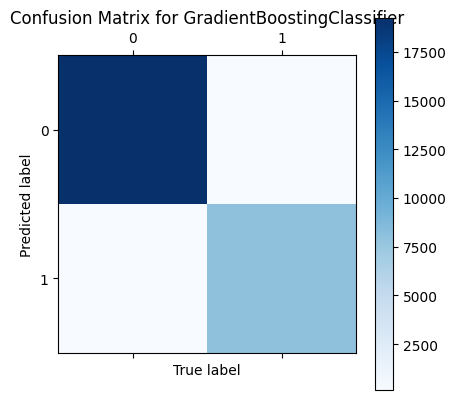

DecisionTreeClassifier Accuracy: 0.9907279971024991


<Figure size 600x600 with 0 Axes>

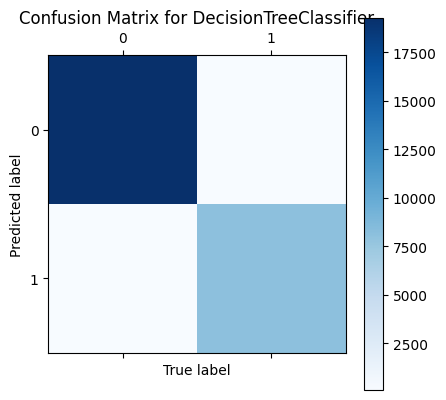

KNeighborsClassifier Accuracy: 0.9897500905469033


<Figure size 600x600 with 0 Axes>

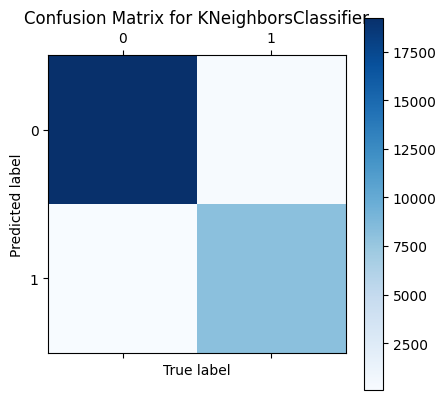

In [181]:
MalDataSet = pd.read_csv("MalwareData.csv", sep="|")
legit = MalDataSet[0:41323].drop(['legitimate'], axis=1)
mal = MalDataSet[41323::].drop(['legitimate'], axis=1)
print("The Shape of the legit dataset is %s samples, %s features" % (legit.shape[0], legit.shape[1]))
print("Shape of malware dataset is %s samples, %s features" % (mal.shape[0], mal.shape[1]))
X = MalDataSet.drop(['Name', 'md5', 'legitimate'], axis=1)
y = MalDataSet['legitimate']
clf = ExtraTreesClassifier()
clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print(X_new.shape)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)


models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f'{name} Accuracy: {accuracy}')
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 6))
    plt.matshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.colorbar()
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.show()

<hr style="border-color:gray; width:75%;box-shadow:0px 1px 3px gray;">

<p style="font-size:20px;text-align:center;font-family:sans-serif;">Ultimately, three out of four models demonstrated superior performance by achieving the highest scores with minimal error rates. However, it is imperative to ensure the integrity of both the dataset and the code. Taking all factors into account, the model referred to as 'RandomForestClassifier' emerges as the most suitable choice for this task.</p>

<hr style="border-color:gray; width:75%;box-shadow:0px 1px 3px gray;">